<a href="https://colab.research.google.com/github/nabilaaryanti/UAS-Kapita-Selekta/blob/main/UAS_KAPITA_SELEKTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UAS KAPITA SELEKTA KELOMPOK ERUPSI**


> Deadline **Selasa, 14 Desember 2021**




*   Crawling data twitter dengan keyword Erupsi
*   EDA (like, retweet, waktu terbanyak tweet, dll)
*   Preprocessing twitter text
*   NLP & twitter sentimental analysis
*   Visualisasi
*   Kesimpulan







# Import Moduls

## Install some moduls

In [7]:
!pip install unidecode twython tweepy beautifulsoup4 tika

In [8]:
pip install docx2txt

In [9]:
pip install Unidecode

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Load some moduls

In [11]:
import warnings; warnings.simplefilter('ignore')
import tweepy, json, nltk, urllib.request, requests, os, random, cv2
from urllib.request import Request, urlopen
from twython import TwythonStreamer
from bs4 import BeautifulSoup as bs
from tqdm import tqdm
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from collections import Counter
import re, itertools, docx2txt
from nltk.stem import WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize
from spacy.lang.id import Indonesian
from html import unescape
from unidecode import unidecode
from nltk.tokenize import TweetTokenizer; Tokenizer = TweetTokenizer(reduce_len=True)
from nltk.stem import PorterStemmer;ps = PorterStemmer()
from string import punctuation
from bz2 import BZ2File as bz2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from textblob import TextBlob
import time
from google.colab import files
plt.style.use('bmh'); sns.set()
%matplotlib inline

# Crawling Twitter Data
Data Twitter yang akan digunakan pada Social Media Analysis ini berkaitan dengan bencana alam Erupsi, sehingga kata kunci yang akan kami gunakan yaitu "Erupsi gunung", "Erupsi Semeru" dan "Erupsi Merapi". Tiga kata kunci tersebut adalah kata kunci yang akhir-akhir menjadi Trending Topic Twitter dikarenakan terjadinya Erupsi pada gunung semeru dan merapi. Data ini kami ambil pada hari Selasa, 07 Desember 2021 pukul 21.00 WIB.

In [ ]:
Ck = 'TzNLDZWobWBvrIj9Iv6a9DOum' # consumer_key
Cs = 'dsM8YfWnYWXN3SIbjXeqc6bFA3o7leuIeD93J7bMLzPnsguNfA' # consumer_secret
At = '1331229969419124739-BDzaf41o3xKp5PstMXOhvQhsEmWxf7' # access_token
As = '4tJukJjqF03XrfTAytVUwqqWpRBMOFOc4XtUazBj7rJNA' # access_secret
'Done'

'Done'

In [ ]:
auth = tweepy.auth.OAuthHandler(Ck, Cs)
auth.set_access_token(At, As)
api = tweepy.API(auth, wait_on_rate_limit=True, timeout=180, retry_count=5, retry_delay=3)
usr_ = api.verify_credentials()
print('You are now connected to twitter server'.format(usr_.name))

You are now connected to twitter server


In [ ]:
qry = 'gunung erupsi'
N = 5 # jumlah N tweet "terkini" yang ingin diambil
T = []
for post in tqdm(tweepy.Cursor(api.search, q=qry, lang='id', tweet_mode='extended').items(N)):
    T.append(post)

"Selesai mengambil {} tweet tentang '{}'".format(len(T), qry)

5it [00:00, 18.37it/s]


"Selesai mengambil 5 tweet tentang 'gunung erupsi'"

In [ ]:
tweet = [t._json for t in T]
print(' Berhasil mendapatkan {} tweets'.format(len(tweet)))

 Berhasil mendapatkan 5 tweets


In [ ]:
import json
def saveTweets(tweets, file='Tweets.json'): #in Json Format
    with open(file, 'w') as f:
        for t in tweets:
            try:
                f.write(json.dumps(t)+'\n')
            except:
                pass

In [ ]:
# Menyimpan hasil crawling twitter
fileName = 'GunungErupsi.json'
saveTweets(tweet, file=fileName)
print('Saved to '+fileName)

Saved to GunungErupsi.json


#EDA

In [ ]:
data1 = pd.read_json('/content/UAS-Kapita-Selekta/data/ErupsiSemeru.json', lines = True)
data2 = pd.read_json('/content/UAS-Kapita-Selekta/data/ErupsiMerapi.json', lines = True)
data3 = pd.read_json('/content/UAS-Kapita-Selekta/data/GunungErupsi.json', lines = True)

In [ ]:
#combine all data
df = pd.concat([data1, data2, data3])
df = df.reset_index(drop= True)

In [ ]:
# Mengecek banyaknya baris dan kolom data
N, P = df.shape
'baris = ', N, ', Kolom = ', P

('baris = ', 15000, ', Kolom = ', 31)

In [ ]:
df.keys()

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'metadata', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count',
       'favorite_count', 'favorited', 'retweeted', 'lang', 'extended_entities',
       'possibly_sensitive', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status'],
      dtype='object')

In [ ]:
data = df[['created_at', 'id', 'id_str', 'full_text','source', 'in_reply_to_status_id', 'in_reply_to_status_id_str',
         'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'geo', 'retweet_count',
         'favorite_count', 'lang' ]]

In [ ]:
user = df['user']

In [ ]:
#ubah kolom user menjadi dataframe baru
user_list = []
for name in user:
  user_list.append(name)

In [ ]:
username = pd.DataFrame(user_list)
username = username[['name', 'screen_name', 'location', 'verified', 'followers_count', 'friends_count']]
username.tail()

,name,screen_name,location,verified,followers_count,friends_count
14995,Ŕàķèť Ňýãmůķ 🇮🇩🇮🇩🇮🇩,deeepi13,United States,False,10589,8519
14996,Karmila155,Karmila155,,False,739,802
14997,calon ibu negara💃,thelightbuzz,,False,762,833
14998,BeritaCenter,BeritaCenter,"DKI Jakarta, Indonesia",False,8795,4111
14999,calon ibu negara💃,thelightbuzz,,False,762,833


In [ ]:
# menggabungkan dataframe sebelumnya dengan dataframe user
dataFinal = pd.concat([data, username], axis=1)
dataFinal.head()

,created_at,id,id_str,full_text,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,retweet_count,favorite_count,lang,name,screen_name,location,verified,followers_count,friends_count
0,2021-12-07 12:40:05+00:00,1468198630519558144,1468198630519558144,RT @ListyoSigitP: Pagi ini Saya meninjau lebih...,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,NaN,111,0,in,🇮🇩🐦 Eka Kurnia™ 🐦🇮🇩,ekurnia82,Banten - DKI Jakarta (PP),False,1643,3201
1,2021-12-07 12:40:05+00:00,1468198628699213830,1468198628699213824,RT @6undul0h: Innalillahi wa innailaihi rojiun...,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,NaN,4,0,in,🏴 #neversurrender,wiezz2,,False,681,947
2,2021-12-07 12:40:05+00:00,1468198628216897537,1468198628216897536,RT @Abdillahonim: Tawaf TV: Guru dan Murid di ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,None,NaN,21,0,in,Triple_K,thewayon1,,False,146,436
3,2021-12-07 12:40:04+00:00,1468198624265838596,1468198624265838592,RT @LautHumas: Polri Gelar Operasi Kemanusiaan...,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,NaN,3,0,in,Al Ghifari 2005,2005Ghifari,,False,2,4
4,2021-12-07 12:40:02+00:00,1468198616216924162,1468198616216924160,#BanserTanggapBencana Satkorcab Banser Kab. Pa...,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,NaN,0,0,in,Khoirul Umam,Umam_elchoiru,"Diantara Kopi, NU dan Kamu",False,1923,1206


In [ ]:
#mengecek data yang duplikat pada dataFinal
print(dataFinal.shape)
dataFinal.duplicated().sum()

(15000, 20)


612

In [ ]:
#menghapus data duplikat
dataFinal.drop_duplicates(inplace=True)
print(dataFinal.duplicated().sum()) # hapus data yang duplikat
print(dataFinal.shape) # re-check data

0
(14388, 20)


In [ ]:
dataFinal.keys()

Index(['created_at', 'id', 'id_str', 'full_text', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'geo', 'retweet_count', 'favorite_count',
       'lang', 'name', 'screen_name', 'location', 'verified',
       'followers_count', 'friends_count'],
      dtype='object')

In [ ]:
dataFinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14388 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   created_at                 14388 non-null  datetime64[ns, UTC]
 1   id                         14388 non-null  int64              
 2   id_str                     14388 non-null  int64              
 3   full_text                  14388 non-null  object             
 4   source                     14388 non-null  object             
 5   in_reply_to_status_id      486 non-null    float64            
 6   in_reply_to_status_id_str  486 non-null    float64            
 7   in_reply_to_user_id        816 non-null    float64            
 8   in_reply_to_user_id_str    816 non-null    float64            
 9   in_reply_to_screen_name    816 non-null    object             
 10  geo                        0 non-null      float64            
 11  re

# Text Preprocessing

In [ ]:
#ubah nama kolom full_text menjadi text
dataFinal.rename(columns={'full_text':'text'}, inplace=True)

In [ ]:
def crawlFiles(dPath, types = None):
    #dPath = 'C:/Temp', types ='pdf'
    if types:
        return [dPath+'/'+f for f in os.listdir(dPath) if f.endswith('.'+types)]
    else:
        return [dPath+'/'+f for f in os.listdir(dPath)]
def readBz2(file):
    with bz2(file, "r") as bzData:
        txt = []
        for line in bzData:
            try:
                txt.append(line.strip().decode('utf-8','replace'))
            except:
                pass
    return ' '.join(txt)

In [ ]:
def LoadDocuments(dPath=None,types=None, file = None): # types = ['pdf','doc','docx','txt','bz2']
    Files, Docs = [], []
    if types:
        for tipe in types:
            Files += crawlFiles(dPath,tipe)
    if file:
        Files = [file]
    if not types and not file: # get all files regardless of their extensions
        Files += crawlFiles(dPath)
    for f in Files:
#        if f[-3:].lower()=='pdf':
#            try:
#                Docs.append(PDF(f).string)
#            except:
#                print('error reading{0}'.format(f))
        if f[-3:].lower()=='txt':
            try:
                df=open(f,"r",encoding="utf-8", errors='replace')
                Docs.append(df.readlines());df.close()
            except:
                print('error reading{0}'.format(f))
        elif f[-3:].lower()=='bz2':
            try:
                Docs.append(readBz2(f))
            except:
                print('error reading{0}'.format(f))
        elif f[-4:].lower()=='docx':
            try:
                Docs.append(docx2txt.process(f))
            except:
                print('error reading{0}'.format(f))
        elif f[-3:].lower()=='csv':
            Docs.append(pd.read_csv(f))
        else:
            print('Unsupported format {0}'.format(f))
    if file:
        Docs = Docs
    return Docs, Files

def LoadStopWords(lang, sentiment = True):
    L = lang.lower().strip().split(':')
    if sentiment:
        if L == 'en' or L == 'english' or L == 'inggris':
            lemmatizer = WordNetLemmatizer()
            stops = set([t.strip().split(':') for t in LoadDocuments(file = '/content/UAS-Kapita-Selekta/text processing/stopword/20190327_stopword_id.txt')[0]])
        elif L == 'in' or L == 'indonesia' or L == 'indonesian':
            lemmatizer = Indonesian()
            stops = set([t.strip().split(':') for t in LoadDocuments(file = '/content/UAS-Kapita-Selekta/text processing/stopword_noise/20190327_stopword_noise.txt')[0]])
        else:
            print('Warning! Languange not recognized. Empty stopword given')
            stops = set(); lemmatizer = None
    else:
        if L == 'en' or L == 'english' or L == 'inggris':
            lemmatizer = WordNetLemmatizer()
            stops = set([t.strip().split(':') for t in LoadDocuments(file = '/content/UAS-Kapita-Selekta/text processing/stopword_en/20190327_stopwords_en.txt')[0]])
        elif L == 'in' or L == 'indonesia' or L == 'indonesian':
            lemmatizer = Indonesian()
            stops = set([t.strip().split(':') for t in LoadDocuments(file = '/content/UAS-Kapita-Selekta/text processing/stopword/20190327_stopword_id.txt')[0]])
        else:
            print('Warning! Languange not recognized. Empty stopword given')
            stops = set(); lemmatizer = None
    return stops, lemmatizer

In [ ]:
def fixTags(T):
    getHashtags = re.compile(r"#(\w+)")
    pisahtags = re.compile(r'[A-Z][^A-Z]*')
    t = T
    tagS = re.findall(getHashtags, T)
    for tag in tagS:
        proper_words = ' '.join(re.findall(pisahtags, tagS[0]))
        t = t.replace('#'+tag, proper_words)
    return t

def cleanText(T, fix={}, pattern2 = False, lang = 'id', lemma=None, stops = set(), symbols_remove = False, numbers_remove = False, hashtag_remove = False, min_charLen = 0):
    # lang & stopS only 2 options : 'en' atau 'id'
    # symbols ASCII atau alnum
    pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    pattern1 = re.compile(r'pic.twitter.com/(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    if pattern2:
        pattern2 = re.compile(r'@(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+') #remove@
        t = re.sub(pattern2, ' ',T)
    else:
        t = T
    t = re.sub(pattern,' ',t) #remove urls if any
    t = re.sub(pattern1,' ',t)
    t = unescape(t) # html entities fix
    if hashtag_remove:
        t = fixTags(t) # fix abcDef
    else:
        t = t
    t = t.lower().strip() # lowercase
    t = unidecode(t)
    t = ''.join(''.join(s)[:2] for _, s in itertools.groupby(t)) # remove repetition
    t = sent_tokenize(t) # sentence segmentation. String to list
    for i, K in enumerate(t):
        if symbols_remove:
            K = re.sub(r'[^.,a-zA-Z0-9 \n\.]',' ',K)
            K = K.replace(',',' ').replace('.',' ')
            K = ''.join(c for c in K if c not in punctuation)
            K = re.sub('\s+',' ',K).strip()

        if numbers_remove:
            K = re.sub(r'[0-9]',' ',K)
            K = re.sub('\s+',' ',K)

        cleanList = []
        if lang =='en':
            listKata = word_tokenize(K) # word tokenize
            for token in listKata:
                if token in fix.keys():
                    token = fix[token]
                if lemma:
                    token = lemma.lemmatize(token)
                if stops:
                    if len(token)>=min_charLen and token not in stops:
                        cleanList.append(token)
                else:
                    if len(token)>=min_charLen:
                        cleanList.append(token)
            t[i] = ' '.join(cleanList)
        else:
            if lemma:
                K = lemma(K)
                listKata = [token.text for token in K]
            else:
                listKata = TextBlob(K).words

            for token in listKata:
                if token in fix.keys():
                    token = fix[token]

                if lemma:
                    token = lemma(token)[0].lemma_
                    #token = stemmer.stem(token)
                if stops:
                    if len(token)>=min_charLen and token not in stops:
                        cleanList.append(token)
                else:
                    if len(token)>=min_charLen:
                        cleanList.append(token)
            t[i] = ' '.join(cleanList).lstrip()
    return ' '.join(t) # Return kalimat lagi

def cleanText_(T, fix={}, min_charLen = 0):
    t = T
    t = t.lower().strip() # lowercase
    t = unidecode(t)
    t = ''.join(''.join(s)[:2] for _, s in itertools.groupby(t)) # remove repetition
    t = sent_tokenize(t) # sentence segmentation. String to list
    for i, K in enumerate(t):
        cleanList = []
        listKata = TextBlob(K).words
        for token in listKata:
            if token in fix.keys():
                token = fix[token]
                cleanList.append(token)
            else:
                if len(token)>=min_charLen:
                    cleanList.append(token)
        t[i] = ' '.join(cleanList).lstrip()
    return ' '.join(t) # Return kalimat lagi

def handlingnegation (text):
    match = re.compile(r'(tidak|kurang|bukan|jangan|tapi|tetapi) (\w+)').findall(text)
    match = list(set(match))
    for i,word in enumerate(match):
        if ' '.join(match[i]) in text:
            kata = text.replace(' '.join(match[i]), str(match[i][0])+' '+'negx'+str(match[i][1]))
            text = kata
    return text

In [ ]:
def print_Topics(model, feature_names, Top_Topics, n_top_words):
    for topic_idx, topic in enumerate(model.components_[:Top_Topics]):
        print("Topic #%d:" %(topic_idx+1))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

def getTopics(Txt,n_topics=5, Top_Words=7):
    #Txt = [t['nlp'] for t in Tweets] # cleaned: stopwords, stemming
    tf_vectorizer = CountVectorizer(strip_accents = 'unicode', token_pattern = r'\b[a-zA-Z]{3,}\b', max_df = 0.95, min_df = 2)
    dtm_tf = tf_vectorizer.fit_transform(Txt)
    tf_terms = tf_vectorizer.get_feature_names()
    lda_tf = LDA(n_components=n_topics, learning_method='online', random_state=0).fit(dtm_tf)
    vsm_topics = lda_tf.transform(dtm_tf); doc_topic =  [a.argmax()+1 for a in tqdm(vsm_topics)] # topic of docs
    print('In total there are {0} major topics, distributed as follows'.format(len(set(doc_topic))))
    fig4 = plt.figure(); fig4.add_subplot(111)
    plt.hist(np.array(doc_topic), alpha=0.5); plt.show()
    print('Printing top {0} Topics, with top {1} Words:'.format(n_topics, Top_Words))
    print_Topics(lda_tf, tf_terms, n_topics, Top_Words)
    return lda_tf, dtm_tf, tf_vectorizer

In [ ]:
def cleanningtext(data, both = True, onlyclean = False, sentiment = False):
    print('Cleaning Text')
    fSlang = '/content/UAS-Kapita-Selekta/text processing/slangword/20210315_slangword.txt'
    bahasa = 'id'
    stops, lemmatizer = LoadStopWords(bahasa, sentiment = False)
    sw=open(fSlang,encoding='utf-8', errors ='ignore', mode='r');SlangS=sw.readlines();sw.close()
    SlangS = {slang.strip().split(':')[0]:slang.strip().split(':')[1] for slang in SlangS}

    start_time = time.time()
    tqdm.pandas()

    if both:
        data['text'] = data['text'].astype('str')
        data['text'] = data['text'].str.lower()
        data = data[~data.text.str.contains('unavailable')]
        data['cleaned_text'] = data['text'].progress_apply(lambda x : cleanText(x,fix=SlangS, pattern2 = True, lang = bahasa, lemma=lemmatizer, stops = stops, symbols_remove = True, numbers_remove = True, hashtag_remove=False, min_charLen = 2))
        data['cleaned_text'] = data['cleaned_text'].progress_apply(lambda x : handlingnegation(x))
        #data['cleaned_text'] = data['cleaned_text'].progress_apply(lambda x : tm.handlingporn(x))
    elif onlyclean:
        data['cleaned_text'] = data['text'].progress_apply(lambda x : cleanText(x, fix=SlangS, pattern2 = True, lang = bahasa, lemma=lemmatizer, stops = stops, symbols_remove = True, numbers_remove = True, hashtag_remove=False, min_charLen = 3))
    else:
        data['cleaned_text'] = data['text'].progress_apply(lambda x : handlingnegation(x))

    data = data[data['cleaned_text'].notna()]
    print("%s seconds" %(time.time()-start_time))

    return data

In [ ]:
dataFinal = cleanningtext(data = dataFinal, both = True, onlyclean = False, sentiment = False)

Cleaning Text
Warning! Languange not recognized. Empty stopword given


100%|██████████| 14388/14388 [00:00<00:00, 181964.04it/s]

10.485780239105225 seconds


In [ ]:
Result = dataFinal[['cleaned_text']]
#Result.to_csv('/content/UAS-Kapita-Selekta/text processing/result.txt', index=False)
Result.tail()

,cleaned_text
14995,retweet di bawah pimpinan pak bumn gerak cepat...
14996,retweet kementerian bumn bergerak cepat member...
14997,retweet gunung semeru mengalami erupsi pada sa...
14998,panglima tni kirim ton bantuan ke warga terdam...
14999,retweet turut berduka cita untuk para korban l...


# Sentimen Analysis


In [ ]:
# Creating a funtion to get the subjectivity.
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Creating a function to get the polarity.
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Creating two columns to store subjectivity and polarity
Result['Subjectivity'] = Result['cleaned_text'].apply(getSubjectivity)
Result['Polarity'] = Result['cleaned_text'].apply(getPolarity)

In [ ]:
# Deciding whether the text is +ve (+1), neutral (0) or -ve (-1)
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

Result['Analysis'] = Result['Polarity'].apply(getAnalysis)
Result.head()

,cleaned_text,Subjectivity,Polarity,Analysis
0,retweet pagi ini saya meninjau lebih dekat sit...,0.0,0.0,Neutral
1,retweet innalillahi wa innailaihi rojiun bakti...,0.0,0.0,Neutral
2,retweet tawaf televisi guru dan murid di pales...,0.0,0.0,Neutral
3,retweet polri gelar operasi kemanusiaan aman n...,0.0,0.0,Neutral
4,bansertanggapbencana satkorcab banser kabupate...,0.0,0.0,Neutral


# Visualisasi

## Voyant Tools

1. Wordcloud

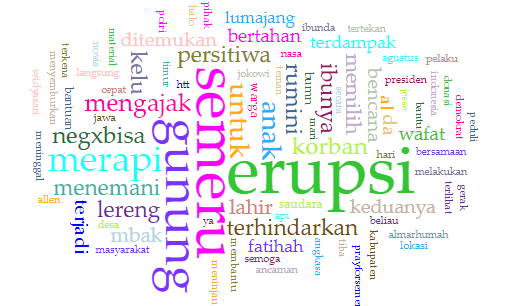

2. Tren

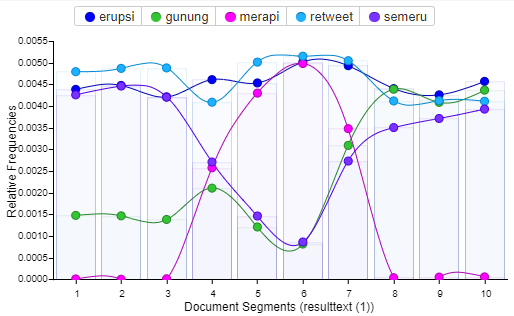



> **Keterangan :**


erupsi = 12557

semeru = 8804

gunung = 6743

merapi = 2485

## Sentiment Analysis

*Sentiment* *analysis* adalah proses mendeteksi sentimen positif atau negatif dalam sebuah teks. Teknik ini sering digunakan oleh bisnis untuk mendeteksi sentimen pada data sosial, mengukur reputasi brand tersebut, dan juga untuk memahami pelanggan.

sumber : [Apa Itu Sentiment Analysis?](https://www.wartaekonomi.co.id/read351541/apa-itu-sentiment-analysis)

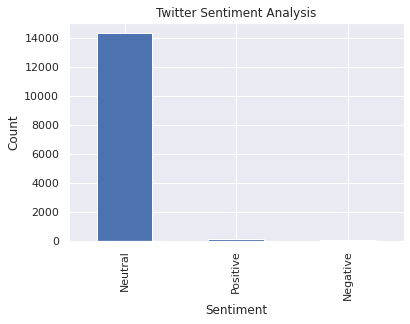

In [ ]:
plt.title('Twitter Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
Result['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
Result['Analysis'].value_counts()

Neutral     14283
Positive       94
Negative       11
Name: Analysis, dtype: int64

Keterangan :
> Dalam kasus ini tweet didominasi dengan sifat tweet netral lebih dari 14 ribu tweet

> Walau yang mendominasi adalah tweet yang bersifat netral tetapi terdapat positive tweet sebanyak 94 dan 11 bersifat negative tweet

## Twitter sent by source

In [ ]:
# first extracting the client name including the >< characters
for source in dataFinal['source']:
    dataFinal['source'] = dataFinal['source'].str.extract('(\>.*\<)', expand=False) #output example: '>Twitter for Android<'

# after that extracting only the letters
for source in data1['source']:
    dataFinal['source'] = dataFinal['source'].str.extract('([a-zA-Z ]+)', expand=False) #output example: 'Twitter for Android'

Text(0.5, 1.0, 'Tweets sent by source')

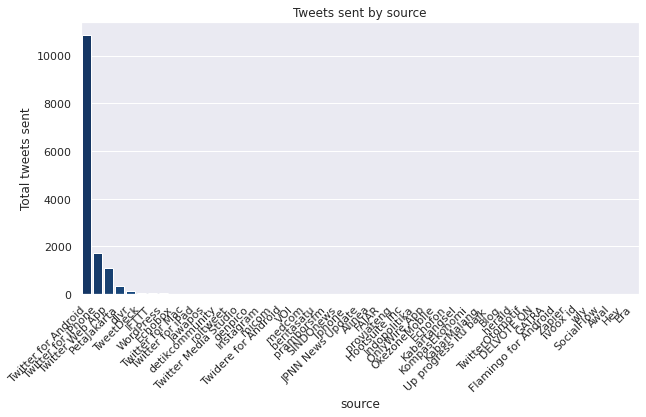

In [ ]:
# Plot
plt.figure(figsize=(10,5))
sns.countplot(x='source', data=dataFinal, palette = 'Blues_r' , order = dataFinal['source'].value_counts().index)
plt.xticks(rotation=45, fontsize='11', horizontalalignment='right')
plt.ylabel('Total tweets sent')
plt.title('Tweets sent by source')

Keterangan:
> Jumlah pengguna twitter paling banyak dalam kasus ini menggunakan twitter for Android dengan jumlah lebih dari 10 ribu pengguna

## Twitter send by username

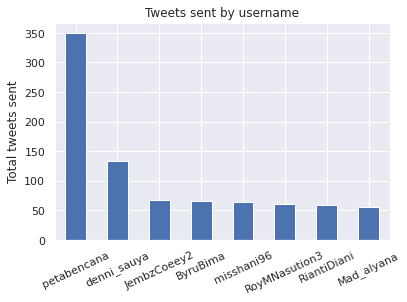

In [ ]:
most_tweet =dataFinal['screen_name'].value_counts()
treshold = 50
maks = most_tweet > treshold
tail_most_tweet = most_tweet.loc[~maks].sum()
most_tweet = most_tweet.loc[maks]
most_tweet.plot(kind='bar')
plt.xticks(rotation=25)
plt.ylabel('Total tweets sent')
plt.title('Tweets sent by username')
plt.show()

In [ ]:
most_tweet

petabencana      350
denni_sauya      134
JembzCoeey2       67
ByruBima          66
misshani96        64
RoyMNasution3     61
RiantiDiani       59
Mad_alyana        55
Name: screen_name, dtype: int64

## Verified User

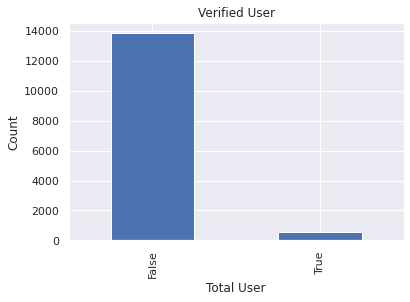

In [ ]:
# verified user
plt.title('Verified User')
plt.xlabel('Total User')
plt.ylabel('Count')
dataFinal['verified'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
dataFinal['verified'].value_counts()

False    13823
True       565
Name: verified, dtype: int64

Keterangan :
> Dalam data tersebut False dimaksudkan adalah akun pengguna tanpa verified dan True dimaksudkan akun pengguna dengan verified

*   Akun verified dalam kasus ini sebanyak 565 akun
*   Dan akun tanpa verified lebih dari 13 ribu akun



## Panjang rata-rata tweet

In [ ]:
len_tweet = dataFinal['text'].str.len()
len_tweet.mean()

145.42806505421186

## Likes Terbanyak

In [ ]:
dataFinal.nlargest(3, 'favorite_count')

,created_at,id,id_str,text,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,retweet_count,favorite_count,lang,name,screen_name,location,verified,followers_count,friends_count,cleaned_text
9431,2021-12-04 13:52:35+00:00,1467129708097650693,1467129708097650688,sebagai anak yang lahir di lereng merapi. erup...,Twitter Web App,NaN,NaN,NaN,NaN,None,NaN,2665,6552,in,Brigata Curva Sud,BCSxPSS_1976,"Sleman, Yogyakarta",False,334982,534,sebagai anak yang lahir di lereng merapi erups...
5557,2021-12-06 10:23:43+00:00,1467801921473839105,1467801921473839104,"update erupsi gunung semeru, hujan abu turun l...",Twitter for Android,NaN,NaN,NaN,NaN,None,NaN,107,580,in,IG: Merapi_Uncover,merapi_uncover,"Yogyakarta, Indonesia",False,70435,951,update erupsi gunung semeru hujan abu turun la...
7871,2021-12-04 16:00:26+00:00,1467161883157286912,1467161883157286912,"erupsi semeru ...\nsemeru lagi punya gawe, sep...",Twitter for Android,NaN,NaN,NaN,NaN,None,NaN,81,527,in,✩Bebeb Bubu🍭,NyaiiBubu,Lor Gapura RW,False,9998,5993,erupsi semeru semeru lagi punya gawe seperti h...


In [ ]:
print("Tweet dengan likes terbanyak")
print("name :", dataFinal['name'][9431])
print("Username :", dataFinal['screen_name'][9431])
print("Tweet :", dataFinal['text'][9431])

Tweet dengan likes terbanyak
name : Brigata Curva Sud
Username : BCSxPSS_1976
Tweet : sebagai anak yang lahir di lereng merapi. erupsi adalah persitiwa yang tak bisa terhindarkan.

kami mengajak seluruh keluarga besar bcs dan sleman fans untuk turun ambil bagian dalam donasi bagi saudara yang terdampak oleh erupsi gunung semeru. https://t.co/9lblgkslvd


## Retweet terbanyak

In [ ]:
dataFinal.nlargest(3, 'retweet_count')

,created_at,id,id_str,text,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,retweet_count,favorite_count,lang,name,screen_name,location,verified,followers_count,friends_count,cleaned_text
4857,2021-12-07 11:00:37+00:00,1468173595910148101,1468173595910148096,rt @widassatyo: al fatihah buat mbak rumini yg...,Twitter for Android,NaN,NaN,NaN,NaN,None,NaN,14569,0,in,ꪖ.𝖈𝖆𝖈𝖆ꪶ,bubblebeq,,False,166,293,retweet al fatihah buat mbak rumini yang memil...
4858,2021-12-07 11:00:34+00:00,1468173583188774913,1468173583188774912,rt @widassatyo: al fatihah buat mbak rumini yg...,Twitter for Android,NaN,NaN,NaN,NaN,None,NaN,14569,0,in,jayahmad,jayadiningrat77,"Depok, Indonesia",False,1879,224,retweet al fatihah buat mbak rumini yang memil...
4861,2021-12-07 11:00:32+00:00,1468173575655882757,1468173575655882752,rt @widassatyo: al fatihah buat mbak rumini yg...,Twitter for Android,NaN,NaN,NaN,NaN,None,NaN,14569,0,in,star,jesvykiev,,False,288,350,retweet al fatihah buat mbak rumini yang memil...


In [ ]:
print("Tweet dengan retweets terbanyak")
print("name :", dataFinal['name'][4857])
print("Username :", dataFinal['screen_name'][4857])
print("Tweet :", dataFinal['text'][4857])

Tweet dengan retweets terbanyak
name : ꪖ.𝖈𝖆𝖈𝖆ꪶ
Username : bubblebeq
Tweet : rt @widassatyo: al fatihah buat mbak rumini yg memilih bertahan dan menemani ibunya saat erupsi semeru terjadi. keduanya ditemukan wafat da…


## Jenis Tweet (Tweet, reply, retweet)

In [ ]:
float_cols = list(dataFinal.select_dtypes(include=['float']).columns.values)
print(float_cols)

['in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'geo']


In [ ]:
# fill Nan's for all float types
dataFinal[float_cols] = dataFinal[float_cols].fillna(0)

# convert float_cols to int
dataFinal[float_cols] = dataFinal[float_cols].astype(int)

# convert timestamp column to datetime type
dataFinal['created_at'] = pd.to_datetime(dataFinal['created_at'])

In [ ]:
# check tweets which have NaN for in_reply_to_status_id but not for in_reply_to_user_id
dataFinal[(dataFinal['in_reply_to_status_id'] == 0) & (dataFinal['in_reply_to_user_id'] != 0)].head()

,created_at,id,id_str,text,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,retweet_count,favorite_count,lang,name,screen_name,location,verified,followers_count,friends_count,cleaned_text
2318,2021-12-07 11:52:29+00:00,1468186651402797057,1468186651402797056,@eruzaside ni penipu jangan2 mati dah kena eru...,Twitter for Android,0,0,1349836626717937664,1349836626717937664,EruzaSide,0,0,0,in,DIME🌻💎🐥,reallllldime,Indonesia! | South Sulawesi,False,295,208,ini penipu jangan negxmati dah kena erupsi gun...
2967,2021-12-07 11:39:26+00:00,1468183365970915331,1468183365970915328,@jokowi dateng ke semeru gak tanggung2 langsun...,Twitter for Android,0,0,366987179,366987179,jokowi,0,8,8,in,Centang Biru ●╰╮✾🅐🅗✾╭╯●,carepucuk,Home Sweet Home,False,509,633,datang ke semeru tidak negxtanggung langsung k...
4486,2021-12-07 11:08:14+00:00,1468175513952800769,1468175513952800768,"@jokowi tiba di lumajang, jawa timur, setelah...",Twitter for Android,0,0,366987179,366987179,jokowi,0,3,5,in,Lady Cebrinx,bringas3006,Indonesia,False,10165,736,tiba di lumajang jawa timur setelah menempuh p...
5286,2021-12-07 03:07:00+00:00,1468054406490779648,1468054406490779648,@humaspoldajatim personil subdit dalmas ditsam...,Twitter for Android,0,0,185101017,185101017,HumasPoldaJatim,0,0,0,in,POLRESTA BANYUWANGI,Polres_Bwi,#Banyuwangi East Java,False,12415,987,personil subdit dalmas ditsamapta polda jatim ...
6100,2021-12-05 09:10:00+00:00,1467420981538947073,1467420981538947072,"@dennysiregar7 bang,kemungkinan bentar lagi pa...",Twitter for Android,0,0,4780649298,4780649298,Dennysiregar7,0,0,0,in,Dedy Setiyawan,DedySet19424526,,False,0,5,bang kemungkinan sebentar lagi pasti gorengann...


In [ ]:
# save as new column
dataFinal['mention_to_user_id'] = dataFinal['in_reply_to_user_id'][(dataFinal['in_reply_to_status_id'] == 0)
                                                     & (dataFinal['in_reply_to_user_id'] != 0)]
# fill Nan's here as well
dataFinal['mention_to_user_id'] = dataFinal['mention_to_user_id'].fillna(0)

Text(0.5, 1.0, 'Kategori Tweet berdasarkan Tipe (tweet, retweet, atau replies)')

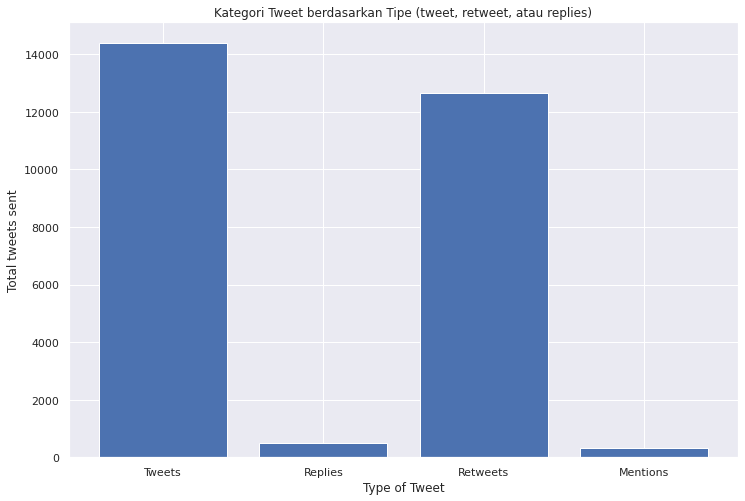

In [ ]:
# create dictionary with values to plot
# the imputed zeros need to be excluded here
data = {
        'Tweets': (dataFinal['id'] != 0).sum(),
        'Replies': (dataFinal['in_reply_to_status_id']!=0).sum(),
        'Retweets': (dataFinal['retweet_count'] != 0).sum(),
        'Mentions':  (dataFinal['mention_to_user_id'] != 0).sum()
        }

names = list(data.keys())
values = list(data.values())

# plot the above data
# set the figure size
plt.figure(figsize=(12,8))

# create a countplot, ordered by count
plt.bar(names, values)

# set the labels and title
plt.xlabel('Type of Tweet')
plt.ylabel('Total tweets sent')
plt.title('Kategori Tweet berdasarkan Tipe (tweet, retweet, atau replies)')

Keterangan :


> Kategori paling banyak dalam bentuk tweet lalu disusul dengan jumlah retweet yang terjadi pada kata 'ERUPSI'



## Tweet Language (Bahasa yang digunakan)

In [ ]:
# Cek bahasa
dataFinal['lang'].value_counts()

in    14388
Name: lang, dtype: int64

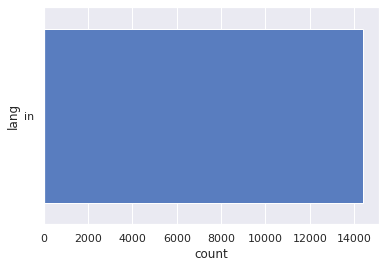

In [ ]:
ax = sns.countplot(y = 'lang', palette = 'muted', data=dataFinal)


Keterangan :
> Semua tweet berbahasa indonesia



## tanggal dan waktu terbanyak tweet

In [ ]:
# create a copy of the dataframe
dataFinal_time = dataFinal.copy()

# set the timestamp column as the index and delete the column
dataFinal_time.index = dataFinal_time['created_at']
del dataFinal_time['created_at']

dataFinal_time.head()

,id,id_str,text,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,retweet_count,favorite_count,lang,name,screen_name,location,verified,followers_count,friends_count,cleaned_text,mention_to_user_id
created_at,,,,,,,,,,,,,,,,,,,,,
2021-12-07 12:40:05+00:00,1468198630519558144,1468198630519558144,rt @listyosigitp: pagi ini saya meninjau lebih...,Twitter for Android,0,0,0,0,None,0,111,0,in,🇮🇩🐦 Eka Kurnia™ 🐦🇮🇩,ekurnia82,Banten - DKI Jakarta (PP),False,1643,3201,retweet pagi ini saya meninjau lebih dekat sit...,0.0
2021-12-07 12:40:05+00:00,1468198628699213830,1468198628699213824,rt @6undul0h: innalillahi wa innailaihi rojiun...,Twitter for Android,0,0,0,0,None,0,4,0,in,🏴 #neversurrender,wiezz2,,False,681,947,retweet innalillahi wa innailaihi rojiun bakti...,0.0
2021-12-07 12:40:05+00:00,1468198628216897537,1468198628216897536,rt @abdillahonim: tawaf tv: guru dan murid di ...,Twitter Web App,0,0,0,0,None,0,21,0,in,Triple_K,thewayon1,,False,146,436,retweet tawaf televisi guru dan murid di pales...,0.0
2021-12-07 12:40:04+00:00,1468198624265838596,1468198624265838592,rt @lauthumas: polri gelar operasi kemanusiaan...,Twitter for Android,0,0,0,0,None,0,3,0,in,Al Ghifari 2005,2005Ghifari,,False,2,4,retweet polri gelar operasi kemanusiaan aman n...,0.0
2021-12-07 12:40:02+00:00,1468198616216924162,1468198616216924160,#bansertanggapbencana satkorcab banser kab. pa...,Twitter for Android,0,0,0,0,None,0,0,0,in,Khoirul Umam,Umam_elchoiru,"Diantara Kopi, NU dan Kamu",False,1923,1206,bansertanggapbencana satkorcab banser kabupate...,0.0


In [ ]:
dataFinal['weekdaynum'] = dataFinal['created_at'].dt.dayofweek
dataFinal['monthdaynum'] = dataFinal['created_at'].dt.day
dataFinal['hourofday'] = dataFinal['created_at'].dt.hour

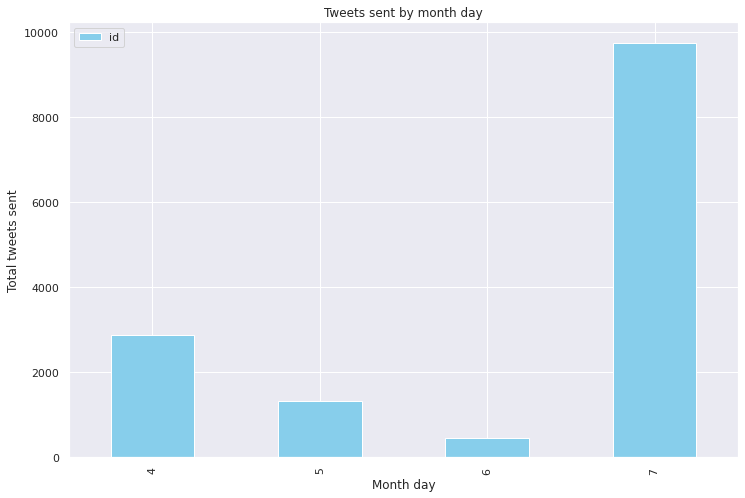

In [ ]:
# create a bar plot with month days
dataFinal.pivot_table(index='monthdaynum',values='id',aggfunc='count').plot(kind='bar',figsize=(12,8),color='skyblue')

# set the labels and title
plt.ylabel('Total tweets sent')
plt.xlabel('Month day')
plt.title('Tweets sent by month day');

Keterangan :

> Paling banyak pada hari ke tujuh dengan tweet lebih dari 8000



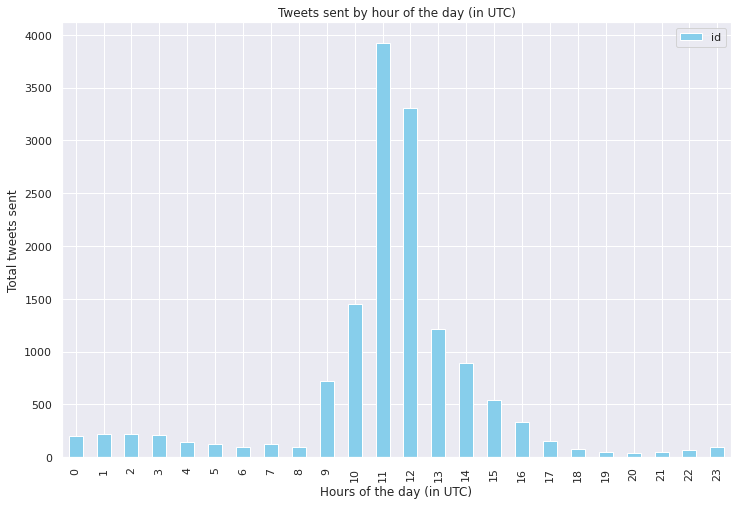

In [ ]:
# create a bar plot with hours of day
dataFinal.pivot_table(index='hourofday',values='id',aggfunc='count').plot(kind='bar',figsize=(12,8),color='skyblue')

# set the labels and title
plt.ylabel('Total tweets sent')
plt.xlabel('Hours of the day (in UTC)')
plt.title('Tweets sent by hour of the day (in UTC)');

Keterangan :
> Paling banyak pada 11 UTC atau sekitar jam 18.00 WIB



# Statistika Deskriptif

In [ ]:
dataFinal.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,retweet_count,favorite_count,followers_count,friends_count,mention_to_user_id,weekdaynum,monthdaynum,hourofday
count,1.438800e+04,1.438800e+04,1.438800e+04,1.438800e+04,1.438800e+04,1.438800e+04,14388.0,14388.000000,14388.000000,1.438800e+04,14388.000000,1.438800e+04,14388.000000,14388.000000,14388.000000
mean,1.467889e+18,1.467889e+18,4.958160e+16,4.958160e+16,4.214962e+16,4.214962e+16,0.0,2533.184668,1.120170,5.406518e+04,1300.882054,1.580568e+16,2.228941,6.185571,11.200097
std,4.389832e+14,4.389832e+14,2.651894e+17,2.651894e+17,2.254543e+17,2.254543e+17,0.0,4706.095855,55.345052,7.103873e+05,2686.864374,1.370732e+17,2.005377,1.238460,3.497797
min,1.467101e+18,1.467101e+18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,4.000000,0.000000
25%,1.467351e+18,1.467351e+18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,9.000000,0.000000,1.180000e+02,175.000000,0.000000e+00,1.000000,5.000000,10.000000
50%,1.468175e+18,1.468175e+18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,90.000000,0.000000,4.130000e+02,403.000000,0.000000e+00,1.000000,7.000000,11.000000
75%,1.468189e+18,1.468189e+18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,2665.000000,0.000000,1.524250e+03,1134.250000,0.000000e+00,5.000000,7.000000,12.000000
max,1.468211e+18,1.468211e+18,1.468211e+18,1.468211e+18,1.468130e+18,1.468130e+18,0.0,14569.000000,6552.000000,1.728881e+07,32111.000000,1.468130e+18,6.000000,7.000000,23.000000


In [ ]:
# Statistika Sederhana dari data "Numerik"-nya
dataFinal.corr()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,retweet_count,favorite_count,verified,followers_count,friends_count,mention_to_user_id,weekdaynum,monthdaynum,hourofday
id,1.000000,1.000000,0.016748,0.016748,0.061126,0.061126,NaN,0.106102,-0.014801,0.127721,0.040679,0.156304,0.075766,-0.937039,0.993201,-0.125786
id_str,1.000000,1.000000,0.016748,0.016748,0.061126,0.061126,NaN,0.106102,-0.014801,0.127721,0.040679,0.156304,0.075766,-0.937039,0.993201,-0.125786
in_reply_to_status_id,0.016748,0.016748,1.000000,1.000000,0.611873,0.611873,NaN,-0.100624,0.003389,0.035499,-0.010289,-0.018748,-0.021560,-0.018703,0.017383,-0.010918
in_reply_to_status_id_str,0.016748,0.016748,1.000000,1.000000,0.611873,0.611873,NaN,-0.100624,0.003389,0.035499,-0.010289,-0.018748,-0.021560,-0.018703,0.017383,-0.010918
in_reply_to_user_id,0.061126,0.061126,0.611873,0.611873,1.000000,1.000000,NaN,-0.100620,0.002197,0.356839,0.000169,-0.034281,0.594512,-0.056949,0.060623,-0.008610
in_reply_to_user_id_str,0.061126,0.061126,0.611873,0.611873,1.000000,1.000000,NaN,-0.100620,0.002197,0.356839,0.000169,-0.034281,0.594512,-0.056949,0.060623,-0.008610
geo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweet_count,0.106102,0.106102,-0.100624,-0.100624,-0.100620,-0.100620,NaN,1.000000,-0.006152,-0.108592,-0.040453,-0.148664,-0.062072,-0.087624,0.098992,0.045919
favorite_count,-0.014801,-0.014801,0.003389,0.003389,0.002197,0.002197,NaN,-0.006152,1.000000,0.003699,0.010709,0.001131,-0.002282,0.009742,-0.014886,0.002709
verified,0.127721,0.127721,0.035499,0.035499,0.356839,0.356839,NaN,-0.108592,0.003699,1.000000,0.288865,-0.070560,0.560770,-0.121759,0.126311,-0.010850


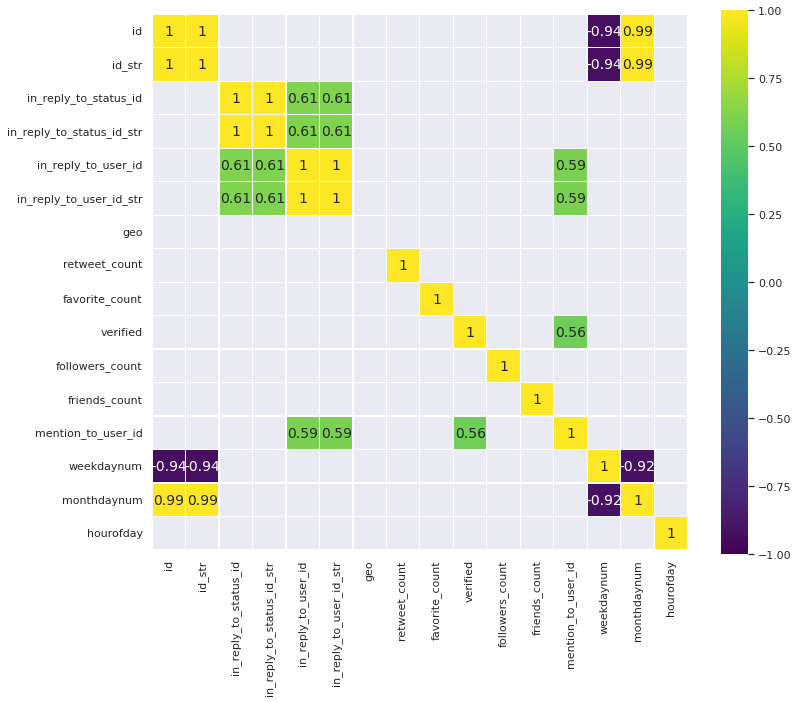

In [ ]:
# HeatMap untuk menyelidiki korelasi
corr2 = dataFinal.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr2[(corr2 >= 0.5) | (corr2 <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);

# Kesimpulan

Kami mengambil data menggunakan kata dasar 'Erupsi' pada Jumat, 7 Desember 2021 pada pukul 21.00 WIB dengan jumlah data sekitar 15 ribu. Dari hasil pengolahan data yang kami lakukan kami mendapatkan beberapa informasi yaitu:

*   Erupsi mendapat jumlah kata lebih dari 12 ribu dan menjadi kata terbanyak dalam kasus ini. Disusul dengan kata semeru dengan jumlah lebih dari 8 ribu, lalu kata gunung lebih dari 6 ribu.
*   Berkenaan dengan kata dasar yang kami gunakan pada Sabtu, 4 Desember 2021 Erupsi mengalami Trending Topic Twiter wilayah Indonesia dikarenakan adanya kejadian erupsi gunung Semeru yang menjadi perbincangan dikalangan pengguna Twitter.
*   Dengan ada nya trending tersebut kami mendapatkan analisa bahwa pengguna akun yang telah ter-verified sebanyak 565 akun dan 13 ribu akun tanpa verified berpartisipasi dalam topik erupsi tersebut.
*   Tweet dengan retweet terbanyak didapatkan oleh username "bubblebeq" berisi tentang doa yang dipanjatkan untuk mbak rumini. Dengan kejadian pada tanggal 7 Desember 2021 nama rumini menembus daftar trending topic di wilayah Indonesia. Rumini sendiri adalah salah satu korban dari erupsi gunung semeru yang memiliki kisah haru dengan ditemukan meninggal bersama ibu-nya dalam posisi berpelukan pasca erupsi gunung semeru.
*   Total harian tweet terbanyak didapat pada hari ke tujuh dengan lebih dari seribu tweet.
*   Jumlah pengguna twitter aktif memberikan tweet pada 11 UTC atau sekitar 18.00 WIB.
*   Lalu tweet dengan likes terbanyak diperoleh dengan username "BCSxPSS_1976" berisi tentang ajakan donasi guna korban terdampak erupsi gunung semeru.
*   Dalam data yang kami ambil tweet lebih banyak bersifat netral tanpa hate speech.







